### Movie Recommender

In [31]:
import requests
# color parameters
from termcolor import colored
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

### Source data - Movie ID, Title, Genre and Year

In [32]:
df = pd.read_csv(r'C:\Users\chris\DSC630-T302\movies.csv') 
df['Year'] = df['title'].str.extract(r'\((\d{4})\)$')
df['title'] = df['title'].str[:-6]
df.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


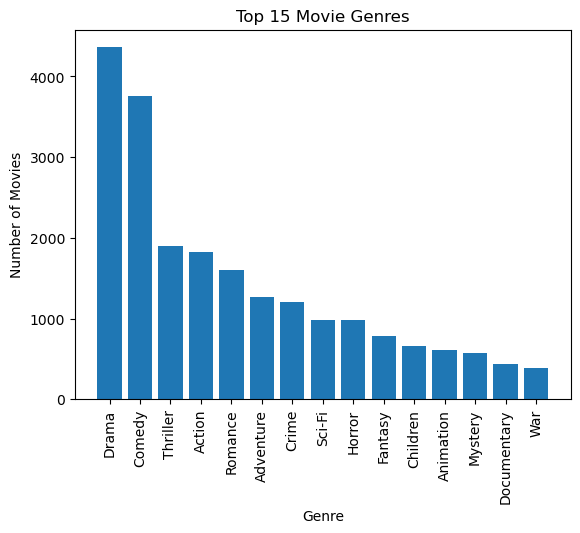

In [33]:
import matplotlib.pyplot as plt

# Group the movies by genre and count the number of movies in each genre
genre_counts = df['genres'].str.split('|').explode().value_counts()

# Set the number of top movies you want to display
top_n = 15

# Select the top movies based on the count
top_movies = genre_counts.head(top_n)

# Create a bar chart
plt.bar(top_movies.index, top_movies.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title(f'Top {top_n} Movie Genres')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

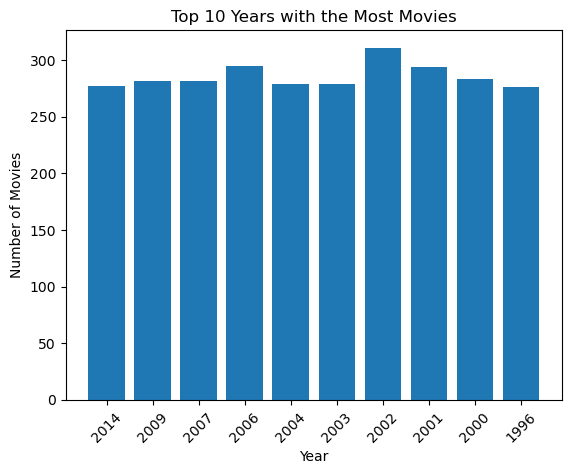

In [35]:
import matplotlib.pyplot as plt

# Get the top 10 years with the most movies
top_years = df['Year'].value_counts().head(10)

# Sort the years in descending order
top_years = top_years.sort_index(ascending=False)

# Create a bar chart
plt.bar(top_years.index, top_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 10 Years with the Most Movies')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


### Source data - Movie ID and Tag

In [14]:
df1 =pd.read_csv(r'C:\Users\chris\DSC630-T302\tags.csv')
df1 = df1[['movieId','tag']]
df1.drop_duplicates(subset=['movieId', 'tag'], inplace=True)
df1 = df1.groupby('movieId')['tag'].agg('|'.join).reset_index()
df1.head()


,movieId,tag
0,1,pixar|fun
1,2,fantasy|magic board game|Robin Williams|game
2,3,moldy|old
3,5,pregnancy|remake
4,7,remake


### Join two tables by movieId

In [15]:
data = pd.merge(df, df1, on="movieId", how='left')
data = data.fillna('')
data.head()

,movieId,title,genres,Year,tag
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,pixar|fun
1,2,Jumanji,Adventure|Children|Fantasy,1995,fantasy|magic board game|Robin Williams|game
2,3,Grumpier Old Men,Comedy|Romance,1995,moldy|old
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,
4,5,Father of the Bride Part II,Comedy,1995,pregnancy|remake


In [16]:
data["genres_tag"] = data["genres"] + '|' + data["tag"]
data['genres_tag'] = data['genres_tag'].str.split('|')

data1 = pd.DataFrame(data['genres_tag'].tolist()).fillna('').add_prefix('genres_tag_')

df_models = pd.concat([data, data1], axis=1)
movie_data = df_models[['movieId','title','Year','genres_tag','genres_tag_0','genres_tag_1','genres_tag_2','genres_tag_3'
                 ,'genres_tag_4','genres_tag_5','genres_tag_6','genres_tag_7','genres_tag_8','genres_tag_9'
                ,'genres_tag_10']]


movie_data.loc[:, 'index'] = movie_data.index

# Print the updated DataFrame

movie_data.tail()

,movieId,title,Year,genres_tag,genres_tag_0,genres_tag_1,genres_tag_2,genres_tag_3,genres_tag_4,genres_tag_5,genres_tag_6,genres_tag_7,genres_tag_8,genres_tag_9,genres_tag_10,index
9737,193581,Black Butler: Book of the Atlantic,2017,"[Action, Animation, Comedy, Fantasy, ]",Action,Animation,Comedy,Fantasy,,,,,,,,9737
9738,193583,No Game No Life: Zero,2017,"[Animation, Comedy, Fantasy, ]",Animation,Comedy,Fantasy,,,,,,,,,9738
9739,193585,Flint,2017,"[Drama, ]",Drama,,,,,,,,,,,9739
9740,193587,Bungo Stray Dogs: Dead Apple,2018,"[Action, Animation, ]",Action,Animation,,,,,,,,,,9740
9741,193609,Andrew Dice Clay: Dice Rules,1991,"[Comedy, ]",Comedy,,,,,,,,,,,9741


In [17]:
combined_features =   movie_data['genres_tag_0'] + ' ' + movie_data['genres_tag_1'] + ' ' + movie_data['genres_tag_2'] + ' ' + movie_data['genres_tag_3'] + ' ' + movie_data['genres_tag_4'] + ' ' + movie_data['genres_tag_5']  + ' ' +  movie_data['genres_tag_6'] + ' ' + movie_data['genres_tag_7'] + ' ' + movie_data['genres_tag_8'] + ' ' + movie_data['genres_tag_9']

### Convert the text data to feature vectors

In [18]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 554)	0.6001876420575903
  (0, 1072)	0.6158063111952145
  (0, 502)	0.2467289393285412
  (0, 308)	0.13659981971524954
  (0, 268)	0.25726474358703094
  (0, 74)	0.2637067544352145
  (0, 34)	0.2128292755647391
  (1, 1533)	0.3105613900424147
  (1, 1179)	0.33165713426090987
  (1, 562)	0.6850036759600161
  (1, 173)	0.35778658940156977
  (1, 866)	0.3055276791202499
  (1, 502)	0.2657634761752139
  (1, 268)	0.13855604603797952
  (1, 34)	0.11462426795143797
  (2, 1019)	0.6852212309326676
  (2, 929)	0.6852212309326676
  (2, 1186)	0.20271096072157382
  (2, 308)	0.1408971105508413
  (3, 430)	0.4664942769137986
  (3, 1186)	0.7263107065017878
  (3, 308)	0.5048324942270912
  (4, 1153)	0.6728006848281035
  (4, 1098)	0.7199001111187067
  (4, 308)	0.17053758678399566
  :	:
  (9732, 1154)	0.551187807109019
  (9732, 584)	0.551187807109019
  (9732, 75)	0.4424850938357555
  (9732, 519)	0.19139575962650285
  (9732, 1221)	0.19139575962650285
  (9732, 21)	0.15515507415593807
  (9732, 308)	0.2266735643517924

### Cosine Similarity

In [19]:
similarity = cosine_similarity(feature_vectors)

In [20]:
print(similarity)

[[1.         0.12561253 0.01924652 ... 0.         0.21511062 0.13659982]
 [0.12561253 1.         0.         ... 0.         0.         0.        ]
 [0.01924652 0.         1.         ... 0.         0.         0.14089711]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.21511062 0.         0.         ... 0.         1.         0.        ]
 [0.13659982 0.         0.14089711 ... 0.         0.         1.        ]]


### User input

The code snippet provides the recommend similar movies based on a user's favorite movie. After getting the movie name from the user, it finds the closest match for the given movie name in the dataset. Then, it retrieves the index of the movie with the closest match.

Next, it calculates the similarity scores between the selected movie and all other movies in the dataset. The movies are then sorted based on their similarity scores in descending order.

Finally, the code prints the suggested movies by iterating over the sorted similar movies and displaying their titles. The loop is limited to printing the top 30 similar movies.


In [23]:
from tabulate import tabulate

# getting the movie name from the user
movie_name = input('Enter your favorite movie name: ')

# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
close_match = find_close_match[0]

# finding the index of the movie with the title
index_of_the_movie = movie_data[movie_data.title == close_match]['index'].values[0]

# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))

# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

# Create a list to store the formatted output
output_data = []

i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movie_data[movie_data.index == index]['title'].values[0]
    genres_from_index = movie_data[movie_data.index == index]['genres_tag'].values[0]
    year_from_index = movie_data[movie_data.index == index]['Year'].values[0]
    genres_str = ', '.join(genres_from_index)
    
    if i < 30:
        output_data.append([i, title_from_index, year_from_index, genres_str])
        i += 1

# Print the output in a tabular format
headers = ["No.", "Title", "Year", "Genres"]
print(tabulate(output_data, headers=headers, tablefmt="grid"))


Enter your favorite movie name: titanic
+-------+-----------------------------------------------------+--------+------------------------------------+
|   No. | Title                                               |   Year | Genres                             |
+=======+=====================================================+========+====================================+
|     1 | Titanic                                             |   1997 | Drama, Romance, shipwreck, romance |
+-------+-----------------------------------------------------+--------+------------------------------------+
|     2 | When Night Is Falling                               |   1995 | Drama, Romance,                    |
+-------+-----------------------------------------------------+--------+------------------------------------+
|     3 | Bed of Roses                                        |   1996 | Drama, Romance,                    |
+-------+-----------------------------------------------------+--------+--------